In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [3]:
cuisine_df = pd.read_csv('cleaned_cuisines.csv')
cuisine_df.head()

,Unnamed: 0,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini,cuisine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,indian
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,indian
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,indian
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,indian
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,indian


<h3> Split into dependent and independent features</h3>

In [4]:
cuisine_label_df = cuisine_df['cuisine']
cuisine_feature_df = cuisine_df.drop(['Unnamed: 0','cuisine'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(cuisine_feature_df, cuisine_label_df, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2796, 380), (1199, 380), (2796,), (1199,))

[0 0 0 ... 0 0 0]


<h4>Scikit-learn offers this table to explain how solvers handle different challenges presented by different kinds of data structures:</h4>

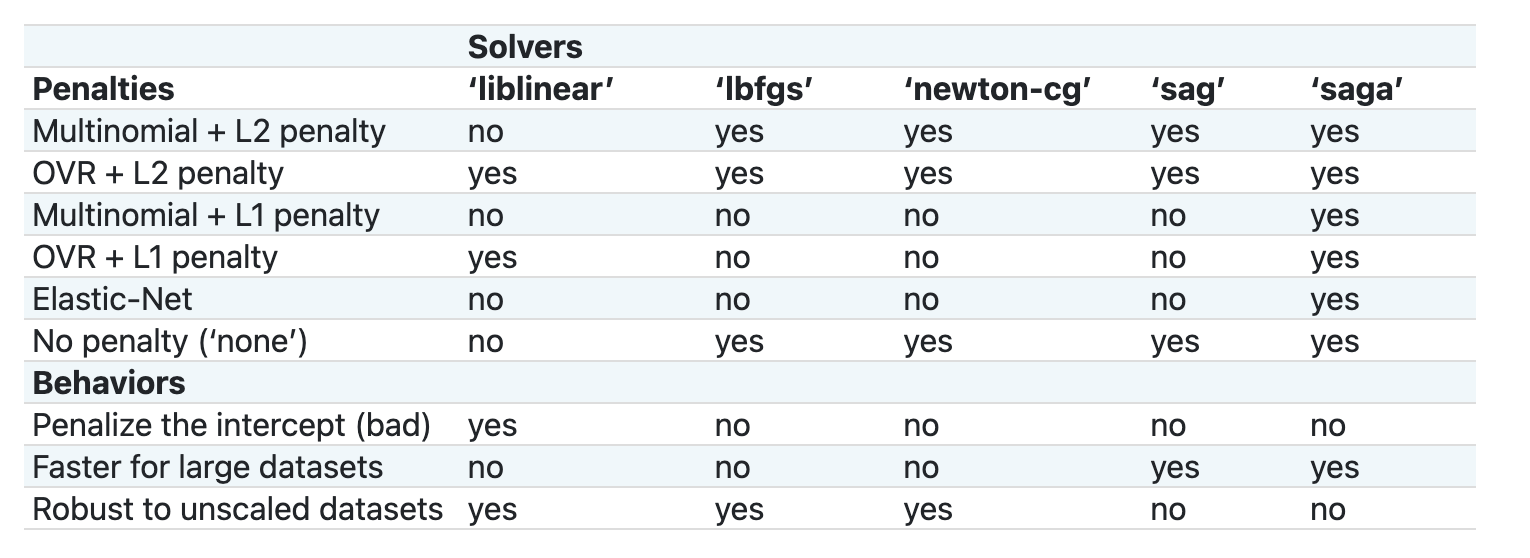

In [25]:
logit = LogisticRegression(multi_class='ovr', solver='liblinear')
model = logit.fit(X_train, np.ravel(y_train))

accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7939949958298582


testing one row data[50]

In [26]:
print(f'ingredients: {X_test.iloc[50][X_test.iloc[50]!=0].keys()}')
print(f'cuisine: {y_test.iloc[50]}')

ingredients: Index(['bell_pepper', 'chicken', 'coconut', 'coriander', 'cumin', 'olive_oil',
       'onion', 'turmeric'],
      dtype='object')
cuisine: thai


In [44]:
test= X_test.iloc[50].values.reshape(-1, 1).T
proba = model.predict_proba(test)
classes = model.classes_
resultdf = pd.DataFrame(data=proba, columns=classes)

topPrediction = resultdf.T.sort_values(by=[0], ascending = [False])
topPrediction.head()


c:\Users\Kresna\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,0
indian,0.607128
thai,0.389851
japanese,0.002113
chinese,0.000883
korean,0.000024
